<a href="https://colab.research.google.com/github/Datan3wbie/Loan_Default_Prediction/blob/main/TFIP_Project_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1268]:
%%capture
!pip install -U pandasql

In [1269]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandasql as ps
from datetime import date
import os

#Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1270]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1271]:
os.chdir('/content/drive/MyDrive/TFIP')

In [1272]:
loan = pd.read_csv("loan_rev2.csv")
account = pd.read_csv("account_rev2.csv")
district = pd.read_csv("district_rev2.csv")
trans = pd.read_csv("trans_rev2.csv")
disp = pd.read_csv("disp_rev2.csv")
client = pd.read_csv("client_rev2.csv")
order = pd.read_csv("order_rev2.csv")
trans = pd.read_csv("trans_rev2.csv")
card = pd.read_csv("card_rev2.csv")

**Data Understanding**

From the initial observation and understanding, we found out that  1 client will have a unique client id and disp id. There are lesser accounts than clients which shows that there are clients that are sharing the same account. Only owners can issue permanent orders and ask for a loan. 

In [1273]:
# Data Exploration
# 1 client will have 1 client id and 1 disp id. There are less accounts than clients (clients share the same account).
# only owners can issue permanent orders and ask for loan

In [1274]:
loan.nunique()

loan_id       682
account_id    682
date          559
amount        645
duration        5
payments      577
status          4
dtype: int64

In [1275]:
account.nunique()

account_id     4500
district_id      77
frequency         3
date           1535
dtype: int64

In [1276]:
district.nunique()

A1     77
A2     77
A3      8
A4     77
A5     53
A6     36
A7     17
A8      6
A9     11
A10    70
A11    76
A12    71
A13    73
A14    44
A15    76
A16    76
dtype: int64

In [1277]:
trans.nunique()

trans_id      1048575
account_id       4500
date             2179
type                3
operation           5
amount          40236
balance        540033
k_symbol            8
bank               13
account          7665
dtype: int64

In [1278]:
disp.nunique()

disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64

In [1279]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [1280]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [1281]:
# Formatting the loan dataset
# Joining loan dataset and account dataset
# Parse the date column
# Data Understanding - Loan and Account

In [1282]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A
2,6863,9188,930728,127080,60,2118,A
3,5325,1843,930803,105804,36,2939,A
4,7240,11013,930906,274740,60,4579,A


In [1283]:
loan_rev = pd.merge(loan, account, on = 'account_id', how='left')

In [1284]:
loan_rev

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y
0,5314,1787,930705,96396,12,8033,B,30,POPLATEK TYDNE,930322
1,5316,1801,930711,165960,36,4610,A,46,POPLATEK MESICNE,930213
2,6863,9188,930728,127080,60,2118,A,45,POPLATEK MESICNE,930208
3,5325,1843,930803,105804,36,2939,A,12,POPLATEK MESICNE,930130
4,7240,11013,930906,274740,60,4579,A,1,POPLATEK TYDNE,930214
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348,C,21,POPLATEK MESICNE,970710
678,5221,1284,981205,52512,12,4376,C,55,POPLATEK MESICNE,970702
679,6402,6922,981206,139488,24,5812,C,3,POPLATEK TYDNE,970512
680,5346,1928,981206,55632,24,2318,C,70,POPLATEK MESICNE,970302


In [1285]:
loan_rev["date_x"] = pd.to_datetime(loan_rev["date_x"], format='%y%m%d')

In [1286]:
loan_rev["date_y"] = pd.to_datetime(loan_rev["date_y"], format='%y%m%d')

In [1287]:
loan_rev = loan_rev.rename(columns={'date_x': 'date_loan', 'date_y': 'date_account'})

In [1288]:
loan_rev

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10
678,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02
679,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12
680,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02


In [1289]:
loan_rev['days_between'] = loan_rev['date_loan'] - loan_rev['date_account']
loan_good = loan_rev.loc[(loan_rev['status'] == 'A') | (loan_rev['status'] == 'C')]
loan_bad = loan_rev.loc[(loan_rev['status'] == 'B') | (loan_rev['status'] == 'D')]

In [1290]:
# Good Loans
loan_good.shape[0]

606

In [1291]:
# Bad Loans
loan_bad.shape[0]

76

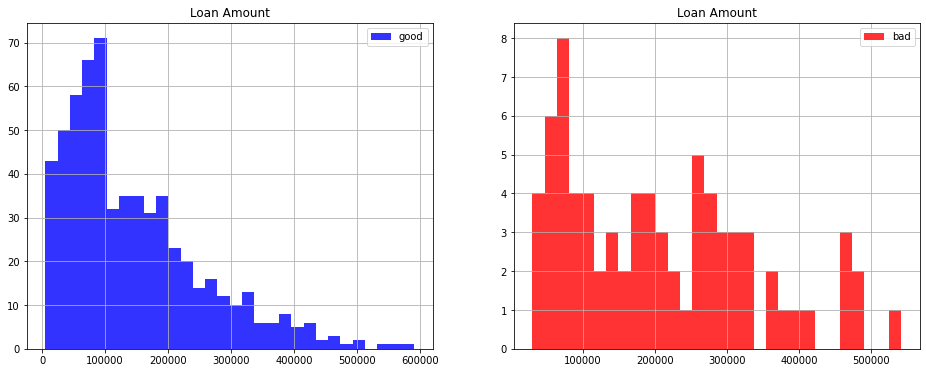

In [1292]:
# Amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good.amount.hist(bins=30, ax=ax1, label='good', color='blue', alpha=0.8)
loan_bad.amount.hist(bins=30, ax=ax2, label='bad', color='red', alpha=0.8)
ax1.set_title('Loan Amount')
ax2.set_title('Loan Amount')
ax1.legend()
ax2.legend()
plt.show()

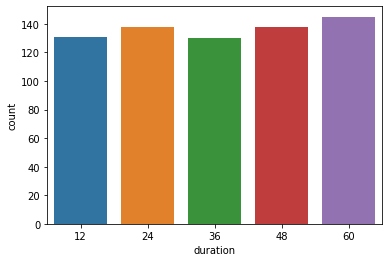

In [1293]:
# duration
sns.countplot(x='duration', data=loan_rev)

The duration of the loans are well spread and not skewed towards any duration. 

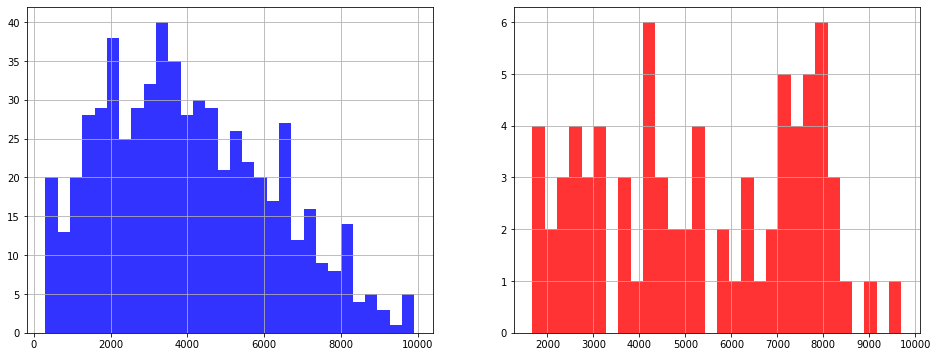

In [1294]:
# payments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good.payments.hist(bins=30, ax=ax1, label='good', color='blue', alpha=0.8)
loan_bad.payments.hist(bins=30, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

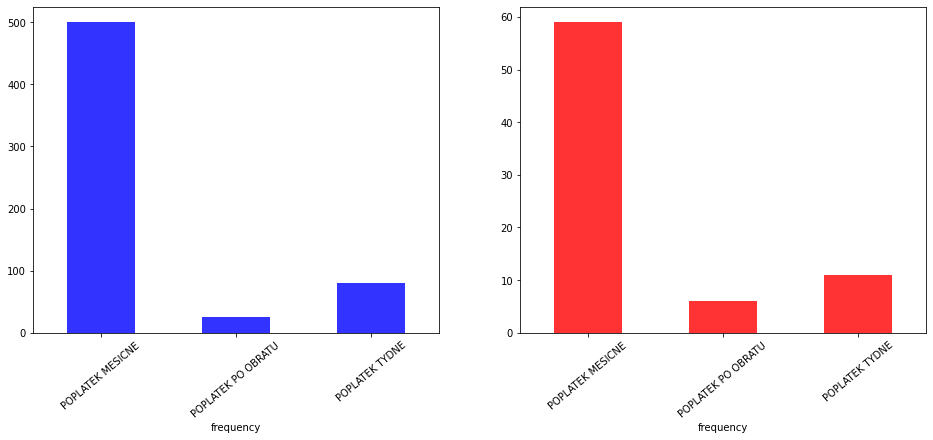

In [1295]:
# frequency
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good[['account_id', 'frequency']].groupby('frequency').count().plot(
    kind='bar', color='blue', rot=40, ax=ax1, alpha=0.8, legend=False)
loan_bad[['account_id', 'frequency']].groupby('frequency').count().plot(
    kind='bar', color='red', rot=40, ax=ax2, alpha=0.8, legend=False)
plt.show()

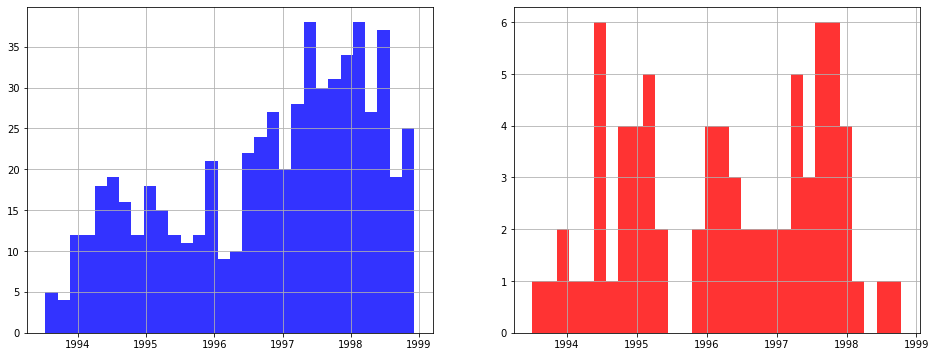

In [1296]:
# date loan issued
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good.date_loan.hist(bins=30, ax=ax1, label='good', color='blue', alpha=0.8)
loan_bad.date_loan.hist(bins=30, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

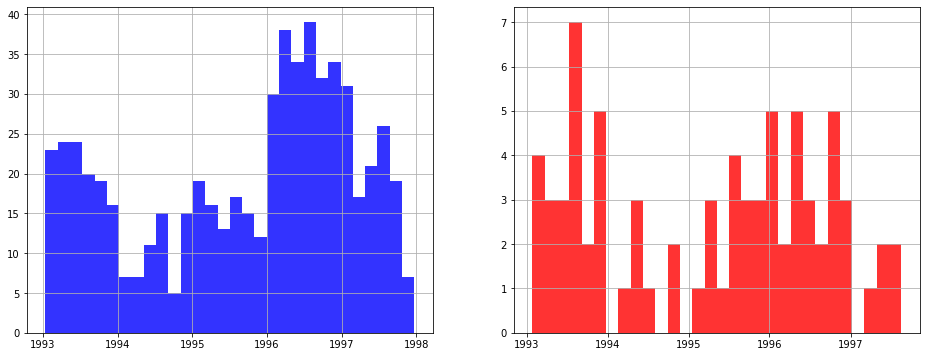

In [1297]:
# date account opened
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good.date_account.hist(bins=30, ax=ax1, label='good', color='blue', alpha=0.8)
loan_bad.date_account.hist(bins=30, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

In [1298]:
loan_good.head()

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,days_between
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,148 days
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,170 days
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,185 days
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,204 days
5,6687,8261,1993-09-13,87840,24,3660,A,13,POPLATEK MESICNE,1993-05-12,124 days


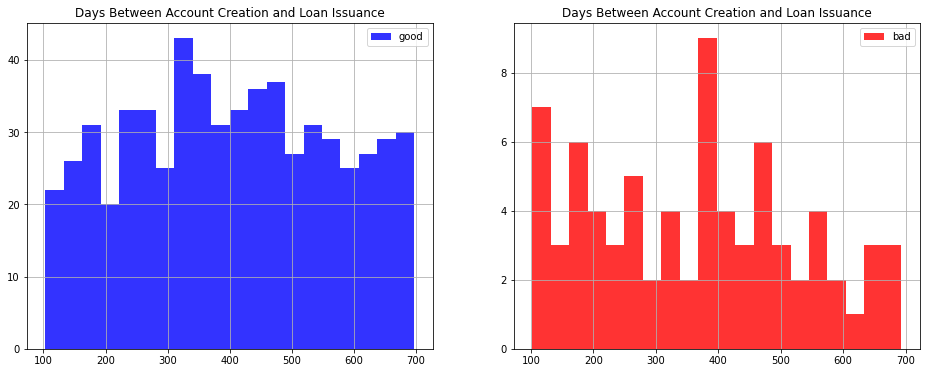

In [1299]:
# days_between
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
loan_good.days_between.dt.days.hist(bins=20, ax=ax1, label='good', color='blue', alpha=0.8)
loan_bad.days_between.dt.days.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.8)
ax1.set_title('Days Between Account Creation and Loan Issuance')
ax2.set_title('Days Between Account Creation and Loan Issuance')
ax1.legend()
ax2.legend()
plt.show()

**Loan and Account Districts**

In [1300]:
# Demographic Features extracted:
# number of inhabitants
# average salary
# average unemployment rate
# entrepreneur rate
# average crime rate

In [1301]:
loan_rev.head()

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,days_between
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,105 days
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,148 days
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,170 days
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,185 days
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,204 days


In [1302]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [1303]:
district['average_unemployment_rate'] = district[['A12', 'A13']].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [1304]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,average_unemployment_rate
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,0.43
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,1.85
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,2.21
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,5.05
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,4.43


In [1305]:
district['average_crime_rate'] = district[['A15', 'A16']].mean(axis=1) / district['A4']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [1306]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,average_unemployment_rate,average_crime_rate
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,0.43,0.082250
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,1.85,0.030084
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,2.21,0.037391
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,5.05,0.039308
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,4.43,0.031794


In [1307]:
district = district.rename(columns={'A1': 'district_id', 'A2': 'district_name', 'A3':'Region','A4':'n_inhabitants','A5':'n_municipal_w_inhabitants<499','A6':'n_municipal_w_inhabitants_500-1999','A7':'n_municipal_w_inhabitants_2000-9999','A8':'n_municipal_w_inhabitants>1000','A9':'no_of_cities','A10':'ratio_of_urban_inhabitants','A11':'average_salary','A14':'entrepreneur_rate'})

In [1308]:
district.head()

,district_id,district_name,Region,n_inhabitants,n_municipal_w_inhabitants<499,n_municipal_w_inhabitants_500-1999,n_municipal_w_inhabitants_2000-9999,n_municipal_w_inhabitants>1000,no_of_cities,ratio_of_urban_inhabitants,average_salary,A12,A13,entrepreneur_rate,A15,A16,average_unemployment_rate,average_crime_rate
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,0.43,0.082250
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,1.85,0.030084
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,2.21,0.037391
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,5.05,0.039308
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,4.43,0.031794


In [1309]:
loan_account_district = pd.merge(loan_rev, district, on = 'district_id', how='left')

In [1310]:
loan_account_district

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,...,no_of_cities,ratio_of_urban_inhabitants,average_salary,A12,A13,entrepreneur_rate,A15,A16,average_unemployment_rate,average_crime_rate
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,10,81.8,9650,3.38,3.67,100,2985,2804,3.67,0.029574
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,10,73.5,8369,1.79,2.31,117,2854,2618,2.31,0.023228
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,5,53.5,8390,2.28,2.89,132,2080,2122,2.89,0.027234
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,6,58.0,8754,3.83,4.31,137,3804,3868,4.31,0.035858
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,1,100.0,12541,0.29,0.43,167,85677,99107,0.43,0.082250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,7,67.0,9104,1.51,2.07,123,2299,2354,2.07,0.022778
678,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,9,33.9,8743,1.88,2.43,111,3659,3894,2.43,0.024796
679,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,5,41.7,8980,1.95,2.21,111,2824,2813,2.21,0.037391
680,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,7,89.9,10177,6.63,7.75,81,9878,10108,7.75,0.035419


In [1311]:
df = loan_account_district

In [1312]:
df.head()

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,...,no_of_cities,ratio_of_urban_inhabitants,average_salary,A12,A13,entrepreneur_rate,A15,A16,average_unemployment_rate,average_crime_rate
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,10,81.8,9650,3.38,3.67,100,2985,2804,3.67,0.029574
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,10,73.5,8369,1.79,2.31,117,2854,2618,2.31,0.023228
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,5,53.5,8390,2.28,2.89,132,2080,2122,2.89,0.027234
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,6,58.0,8754,3.83,4.31,137,3804,3868,4.31,0.035858
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,1,100.0,12541,0.29,0.43,167,85677,99107,0.43,0.082250


In [1313]:
df_good= df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

In [1314]:
df['loan_type'] = df['status']

In [1315]:
replacer = {'A':'good', 'C':'good','B':'bad','D':'bad'}
df['loan_type'] = df['loan_type'].replace(replacer)

In [1316]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,...,ratio_of_urban_inhabitants,average_salary,A12,A13,entrepreneur_rate,A15,A16,average_unemployment_rate,average_crime_rate,loan_type
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,81.8,9650,3.38,3.67,100,2985,2804,3.67,0.029574,bad
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,73.5,8369,1.79,2.31,117,2854,2618,2.31,0.023228,good
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,53.5,8390,2.28,2.89,132,2080,2122,2.89,0.027234,good
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,58.0,8754,3.83,4.31,137,3804,3868,4.31,0.035858,good
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,100.0,12541,0.29,0.43,167,85677,99107,0.43,0.082250,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,67.0,9104,1.51,2.07,123,2299,2354,2.07,0.022778,good
678,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,33.9,8743,1.88,2.43,111,3659,3894,2.43,0.024796,good
679,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,41.7,8980,1.95,2.21,111,2824,2813,2.21,0.037391,good
680,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,89.9,10177,6.63,7.75,81,9878,10108,7.75,0.035419,good


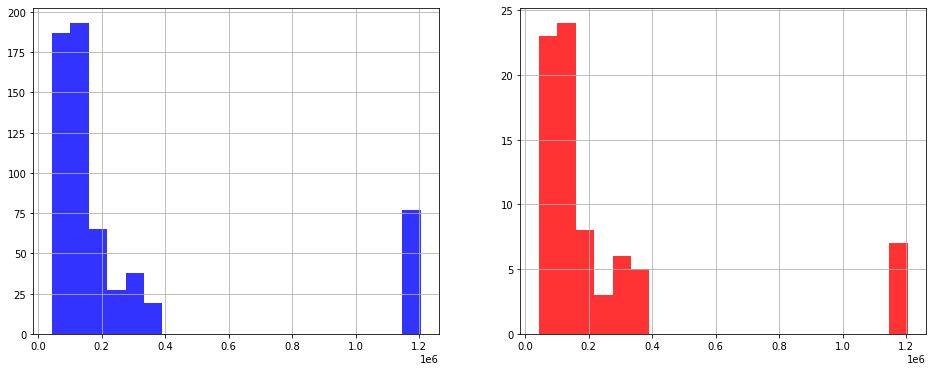

In [1317]:
# n_inhabitants
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.n_inhabitants.hist(bins=20, ax=ax1, label='good', color='blue', alpha=0.8)
df_bad.n_inhabitants.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

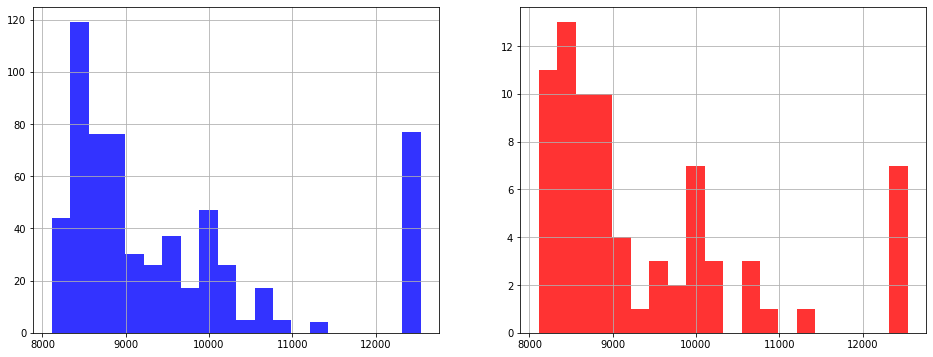

In [1318]:
# average_salary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.average_salary.hist(bins=20, ax=ax1, label='good', color='blue', alpha=0.8)
df_bad.average_salary.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

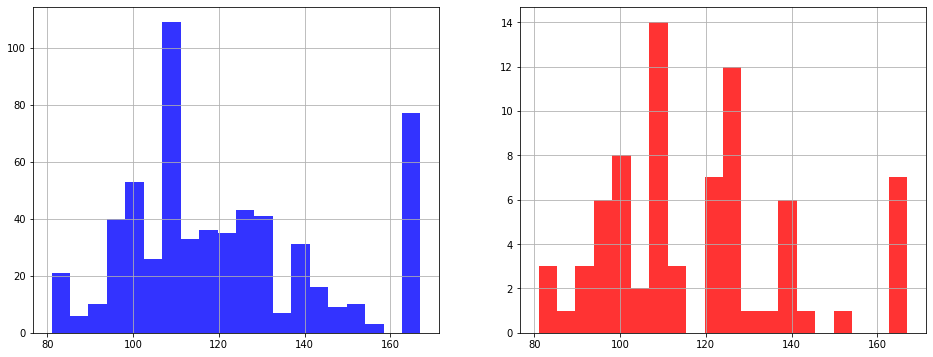

In [1319]:
# entrepreneur_rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.entrepreneur_rate.hist(bins=20, ax=ax1, label='good', color='blue', alpha=0.8)
df_bad.entrepreneur_rate.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

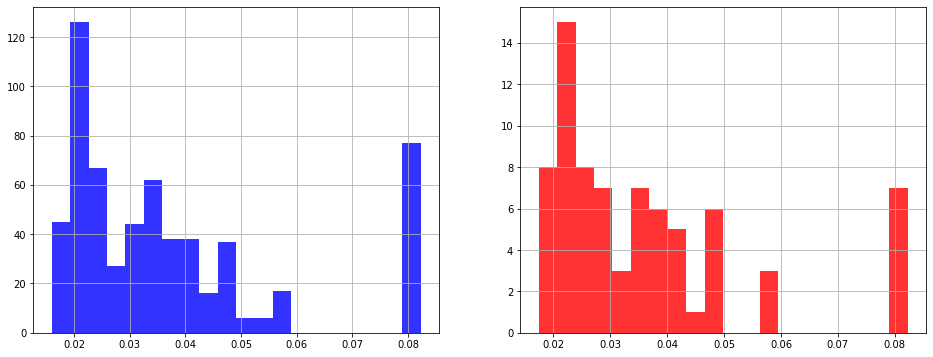

In [1320]:
# average_crime_rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.average_crime_rate.hist(bins=20, ax=ax1, label='good', color='blue', alpha=0.8)
df_bad.average_crime_rate.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

In [1321]:
df = pd.merge(df, disp, on = 'account_id', how='left')

In [1322]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id,frequency,date_account,...,A13,entrepreneur_rate,A15,A16,average_unemployment_rate,average_crime_rate,loan_type,disp_id,client_id,type
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,3.67,100,2985,2804,3.67,0.029574,bad,2166,2166,OWNER
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,2.31,117,2854,2618,2.31,0.023228,good,2181,2181,OWNER
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,2.89,132,2080,2122,2.89,0.027234,good,11006,11314,OWNER
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,4.31,137,3804,3868,4.31,0.035858,good,2235,2235,OWNER
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,0.43,167,85677,99107,0.43,0.082250,good,13231,13539,OWNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,2.07,123,2299,2354,2.07,0.022778,good,127,127,OWNER
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,2.43,111,3659,3894,2.43,0.024796,good,1554,1554,OWNER
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,2.21,111,2824,2813,2.21,0.037391,good,8356,8356,OWNER
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,7.75,81,9878,10108,7.75,0.035419,good,2342,2342,OWNER


In [1323]:
# Extracting the gender and age from the client dataset

In [1324]:
client['birth_number'] = client['birth_number'].apply(str)

In [1325]:
def gender(x):
    if x > 5000:
        return "Female"
    else:
        return "Male"

In [1326]:
client['birthyear'] = client['birth_number'].str[0:2]

In [1327]:
client['y'] = client['birth_number'].str[2:]

In [1328]:
client['y'] = client['y'].apply(float)

In [1329]:
client['gender'] = client['y'].apply(gender)

In [1330]:
def reverse(x):
    if x> 5000:
        return x-5000
    else:
        return x

In [1331]:
client['monthday'] = client['y'].apply(reverse)
client['monthday'] = client['monthday'].apply(int)
client['monthday'] = client['monthday'].apply(str)
client['monthday'] = client['monthday'].apply(lambda x: x.zfill(4))

In [1332]:
client['birthdate'] = client['birthyear'] + client['monthday']

In [1333]:
client['birthdate'] = '19' + client['birthdate']

In [1334]:
client['birthdate'] = pd.to_datetime(client["birthdate"]) 

In [1335]:
def age(birthdate):
    today = date.today()
    one_or_zero = ((today.month, today.day) < (birthdate.month, birthdate.day))
    year_difference = today.year - birthdate.year
    age = year_difference - one_or_zero
    
    return age

In [1336]:
client['age'] = client['birthdate'].apply(age)

In [1337]:
client.drop(columns = ['birth_number','birthyear','y','monthday'], inplace= True)

In [1338]:
client

,client_id,district_id,gender,birthdate,age
0,1,18,Female,1970-12-13,51
1,2,1,Male,1945-02-04,77
2,3,1,Female,1940-10-09,81
3,4,5,Male,1956-12-01,65
4,5,5,Female,1960-07-03,61
...,...,...,...,...,...
5364,13955,1,Female,1945-10-30,76
5365,13956,1,Male,1943-04-06,79
5366,13968,61,Male,1968-04-13,54
5367,13971,67,Female,1962-10-19,59


In [1339]:
# Creating the final dataset

In [1340]:
df = pd.merge(df, client, on = 'client_id', how='left')

In [1341]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id_x,frequency,date_account,...,average_unemployment_rate,average_crime_rate,loan_type,disp_id,client_id,type,district_id_y,gender,birthdate,age
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,3.67,0.029574,bad,2166,2166,OWNER,30,Female,1947-07-22,74
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,2.31,0.023228,good,2181,2181,OWNER,46,Male,1968-07-22,53
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,2.89,0.027234,good,11006,11314,OWNER,45,Male,1936-06-02,85
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,4.31,0.035858,good,2235,2235,OWNER,14,Female,1940-04-20,82
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,0.43,0.082250,good,13231,13539,OWNER,63,Male,1978-09-07,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,2.07,0.022778,good,127,127,OWNER,21,Female,1950-12-27,71
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,2.43,0.024796,good,1554,1554,OWNER,55,Male,1944-12-15,77
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,2.21,0.037391,good,8356,8356,OWNER,3,Male,1969-09-04,52
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,7.75,0.035419,good,2342,2342,OWNER,70,Male,1948-12-18,73


In [1342]:
# In the dataset at most 1 loan is owned by the account owner
df['account_id'].unique().shape[0]

682

In [1343]:
df['same_district'] = df['district_id_x'] == df['district_id_y']

In [1344]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id_x,frequency,date_account,...,average_crime_rate,loan_type,disp_id,client_id,type,district_id_y,gender,birthdate,age,same_district
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,0.029574,bad,2166,2166,OWNER,30,Female,1947-07-22,74,True
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,0.023228,good,2181,2181,OWNER,46,Male,1968-07-22,53,True
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,0.027234,good,11006,11314,OWNER,45,Male,1936-06-02,85,True
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,0.035858,good,2235,2235,OWNER,14,Female,1940-04-20,82,False
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,0.082250,good,13231,13539,OWNER,63,Male,1978-09-07,43,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,0.022778,good,127,127,OWNER,21,Female,1950-12-27,71,True
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,0.024796,good,1554,1554,OWNER,55,Male,1944-12-15,77,True
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,0.037391,good,8356,8356,OWNER,3,Male,1969-09-04,52,True
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,0.035419,good,2342,2342,OWNER,70,Male,1948-12-18,73,True


In [1345]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

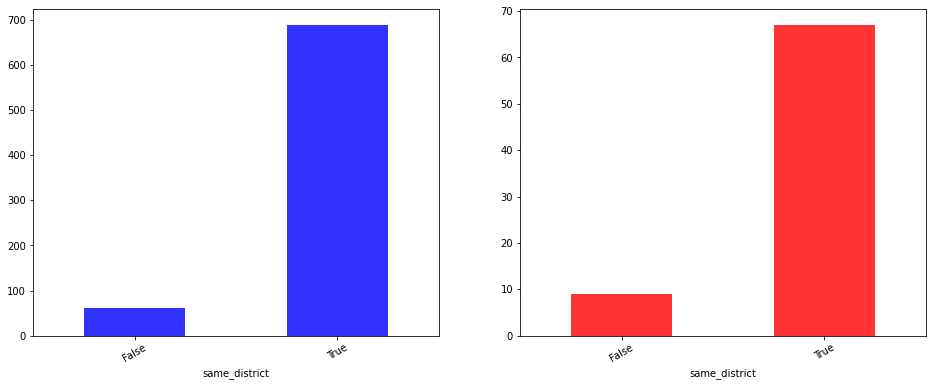

In [1346]:
# Account owner and account is in the same district
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good[['account_id', 'same_district']].groupby('same_district').count().plot(
    kind='bar', color='blue', rot=30, ax=ax1, alpha=0.8, legend=False)
df_bad[['account_id', 'same_district']].groupby('same_district').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.8, legend=False)
plt.show()

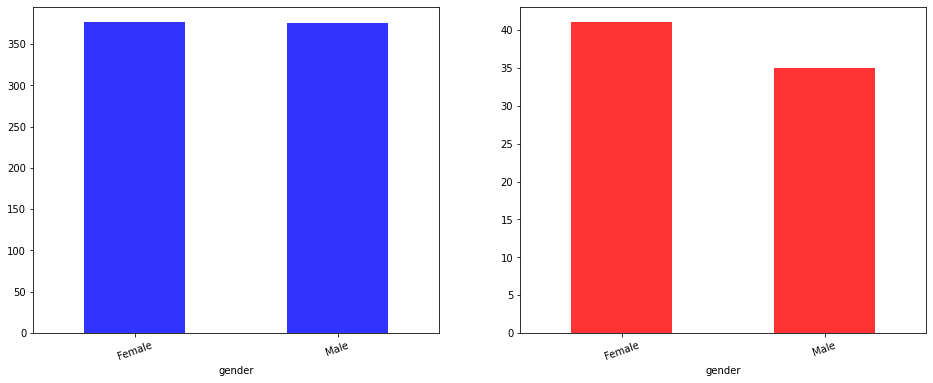

In [1347]:
# Gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good[['account_id', 'gender']].groupby('gender').count().plot(
    kind='bar', color='blue', rot=20, ax=ax1, alpha=0.8, legend=False)
df_bad[['account_id', 'gender']].groupby('gender').count().plot(
    kind='bar', color='red', rot=20, ax=ax2, alpha=0.8, legend=False)
plt.show()

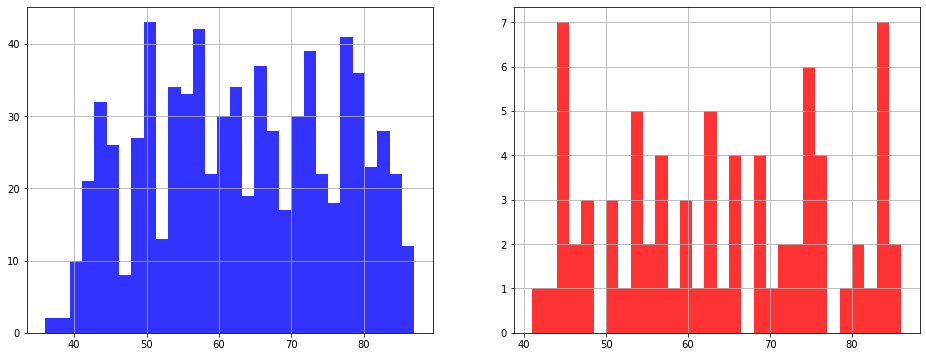

In [1348]:
# owner age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.age.hist(bins=30, ax=ax1, label='good', color='blue', alpha=0.8)
df_bad.age.hist(bins=30, ax=ax2, label='bad', color='red', alpha=0.8)
plt.show()

**Modelling**

For modelling, we will be pick some features and compile into a final table and prepare for Machine Learning.

In [1349]:
df_order = pd.merge(loan["account_id"],order [["account_id","amount"]], on = 'account_id', how='inner')

In [1350]:
df_order

,account_id,amount
0,1787,8033.2
1,1801,4610.0
2,1801,4167.0
3,1801,3419.0
4,1801,956.0
...,...,...
1508,1284,4375.5
1509,6922,5811.7
1510,1928,2317.5
1511,8645,8919.0


In [1351]:
df_order = df_order.rename(columns={'amount':'order_amount'})

In [1352]:
df_order['order_amount'] = df_order.order_amount.astype('float')
df = df.join(df_order.groupby('account_id').mean())
df = df.rename(columns={'order_amount': 'average_order_amount'})

In [1353]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id_x,frequency,date_account,...,loan_type,disp_id,client_id,type,district_id_y,gender,birthdate,age,same_district,average_order_amount
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,bad,2166,2166,OWNER,30,Female,1947-07-22,74,True,NaN
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,good,2181,2181,OWNER,46,Male,1968-07-22,53,True,NaN
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,good,11006,11314,OWNER,45,Male,1936-06-02,85,True,5319.35
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,good,2235,2235,OWNER,14,Female,1940-04-20,82,False,NaN
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,good,13231,13539,OWNER,63,Male,1978-09-07,43,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,good,127,127,OWNER,21,Female,1950-12-27,71,True,NaN
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,good,1554,1554,OWNER,55,Male,1944-12-15,77,True,NaN
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,good,8356,8356,OWNER,3,Male,1969-09-04,52,True,NaN
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,good,2342,2342,OWNER,70,Male,1948-12-18,73,True,6829.00


In [1354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   loan_id                              827 non-null    int64          
 1   account_id                           827 non-null    int64          
 2   date_loan                            827 non-null    datetime64[ns] 
 3   amount                               827 non-null    int64          
 4   duration                             827 non-null    int64          
 5   payments                             827 non-null    int64          
 6   status                               827 non-null    object         
 7   district_id_x                        827 non-null    int64          
 8   frequency                            827 non-null    object         
 9   date_account                         827 non-null    datetime64[ns] 
 10  da

In [1355]:
df_trans = pd.merge(loan["account_id"],trans[["account_id","amount","balance"]], on = 'account_id', how='inner')

In [1356]:
df_trans

,account_id,amount,balance
0,1787,1100.0,1100.0
1,1787,9900.0,11000.0
2,1787,5800.0,16800.0
3,1787,3300.0,20100.0
4,1787,42248.0,62348.0
...,...,...,...
190098,8645,105.8,28641.6
190099,8645,8919.0,19813.8
190100,8645,4015.0,15798.8
190101,8645,25394.0,41192.8


In [1357]:
n_trans = df_trans.groupby('account_id').count().iloc[:, 1]
n_trans.name = 'n_trans'

In [1358]:
n_trans

account_id
2        477
19       301
25       272
37       128
38       129
        ... 
11327     74
11328    144
11349    302
11359    376
11362    343
Name: n_trans, Length: 682, dtype: int64

In [1359]:
df_trans = df_trans.groupby('account_id').mean()
df_trans.columns = ['average_trans_amount', 'average_trans_balance']

In [1360]:
df_trans

,average_trans_amount,average_trans_balance
account_id,,
2,6606.546331,36527.942558
19,5234.044850,16288.927243
25,10864.145588,56471.616912
37,7369.154688,37417.641406
38,4432.235659,34383.792248
...,...,...
11327,7561.997297,56410.387838
11328,9112.357639,46713.342361
11349,13090.351656,48868.020199


In [1361]:
df = df.join(df_trans).join(n_trans)

In [1362]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id_x,frequency,date_account,...,type,district_id_y,gender,birthdate,age,same_district,average_order_amount,average_trans_amount,average_trans_balance,n_trans
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,OWNER,30,Female,1947-07-22,74,True,NaN,NaN,NaN,NaN
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,OWNER,46,Male,1968-07-22,53,True,NaN,NaN,NaN,NaN
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,OWNER,45,Male,1936-06-02,85,True,5319.35,6606.546331,36527.942558,477.0
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,OWNER,14,Female,1940-04-20,82,False,NaN,NaN,NaN,NaN
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,OWNER,63,Male,1978-09-07,43,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,OWNER,21,Female,1950-12-27,71,True,NaN,NaN,NaN,NaN
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,OWNER,55,Male,1944-12-15,77,True,NaN,NaN,NaN,NaN
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,OWNER,3,Male,1969-09-04,52,True,NaN,NaN,NaN,NaN
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,OWNER,70,Male,1948-12-18,73,True,6829.00,5558.397696,33836.186175,217.0


In [1363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   loan_id                              827 non-null    int64          
 1   account_id                           827 non-null    int64          
 2   date_loan                            827 non-null    datetime64[ns] 
 3   amount                               827 non-null    int64          
 4   duration                             827 non-null    int64          
 5   payments                             827 non-null    int64          
 6   status                               827 non-null    object         
 7   district_id_x                        827 non-null    int64          
 8   frequency                            827 non-null    object         
 9   date_account                         827 non-null    datetime64[ns] 
 10  da

In [1364]:
df.drop(columns = ['A12','A13','A15','A16','district_id_y'], inplace= True)

In [1365]:
df = df.rename(columns={'district_id_x ':'district_id'})

In [1366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   loan_id                              827 non-null    int64          
 1   account_id                           827 non-null    int64          
 2   date_loan                            827 non-null    datetime64[ns] 
 3   amount                               827 non-null    int64          
 4   duration                             827 non-null    int64          
 5   payments                             827 non-null    int64          
 6   status                               827 non-null    object         
 7   district_id_x                        827 non-null    int64          
 8   frequency                            827 non-null    object         
 9   date_account                         827 non-null    datetime64[ns] 
 10  da

In [1367]:
df= pd.merge(df,card[["disp_id","type"]], on = 'disp_id', how='left')

In [1368]:
df

,loan_id,account_id,date_loan,amount,duration,payments,status,district_id_x,frequency,date_account,...,type_x,gender,birthdate,age,same_district,average_order_amount,average_trans_amount,average_trans_balance,n_trans,type_y
0,5314,1787,1993-07-05,96396,12,8033,B,30,POPLATEK TYDNE,1993-03-22,...,OWNER,Female,1947-07-22,74,True,NaN,NaN,NaN,NaN,NaN
1,5316,1801,1993-07-11,165960,36,4610,A,46,POPLATEK MESICNE,1993-02-13,...,OWNER,Male,1968-07-22,53,True,NaN,NaN,NaN,NaN,NaN
2,6863,9188,1993-07-28,127080,60,2118,A,45,POPLATEK MESICNE,1993-02-08,...,OWNER,Male,1936-06-02,85,True,5319.35,6606.546331,36527.942558,477.0,NaN
3,5325,1843,1993-08-03,105804,36,2939,A,12,POPLATEK MESICNE,1993-01-30,...,OWNER,Female,1940-04-20,82,False,NaN,NaN,NaN,NaN,classic
4,7240,11013,1993-09-06,274740,60,4579,A,1,POPLATEK TYDNE,1993-02-14,...,OWNER,Male,1978-09-07,43,False,NaN,NaN,NaN,NaN,junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,4989,105,1998-12-05,352704,48,7348,C,21,POPLATEK MESICNE,1997-07-10,...,OWNER,Female,1950-12-27,71,True,NaN,NaN,NaN,NaN,classic
823,5221,1284,1998-12-05,52512,12,4376,C,55,POPLATEK MESICNE,1997-07-02,...,OWNER,Male,1944-12-15,77,True,NaN,NaN,NaN,NaN,NaN
824,6402,6922,1998-12-06,139488,24,5812,C,3,POPLATEK TYDNE,1997-05-12,...,OWNER,Male,1969-09-04,52,True,NaN,NaN,NaN,NaN,NaN
825,5346,1928,1998-12-06,55632,24,2318,C,70,POPLATEK MESICNE,1997-03-02,...,OWNER,Male,1948-12-18,73,True,6829.00,5558.397696,33836.186175,217.0,NaN


In [1369]:
df = df.rename(columns={'type_x':'disp_type','type_y':'card_type'})

In [1370]:
df['card_type'].fillna('No', inplace=True)

In [1371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   loan_id                              827 non-null    int64          
 1   account_id                           827 non-null    int64          
 2   date_loan                            827 non-null    datetime64[ns] 
 3   amount                               827 non-null    int64          
 4   duration                             827 non-null    int64          
 5   payments                             827 non-null    int64          
 6   status                               827 non-null    object         
 7   district_id_x                        827 non-null    int64          
 8   frequency                            827 non-null    object         
 9   date_account                         827 non-null    datetime64[ns] 
 10  da

The Final List

In [1372]:
df_ml = df[['amount', 'duration', 'payments', 'days_between', 'n_inhabitants', 
            'average_salary', 'average_unemployment_rate', 'entrepreneur_rate', 
            'average_crime_rate', 'average_order_amount', 'average_trans_amount',
            'average_trans_balance', 'n_trans', 'age', 
            'frequency', 'card_type', 'same_district', 'gender', 'loan_type']]

In [1373]:
df_ml

,amount,duration,payments,days_between,n_inhabitants,average_salary,average_unemployment_rate,entrepreneur_rate,average_crime_rate,average_order_amount,average_trans_amount,average_trans_balance,n_trans,age,frequency,card_type,same_district,gender,loan_type
0,96396,12,8033,105 days,94812,9650,3.67,100,0.029574,NaN,NaN,NaN,NaN,74,POPLATEK TYDNE,No,True,Female,bad
1,165960,36,4610,148 days,112709,8369,2.31,117,0.023228,NaN,NaN,NaN,NaN,53,POPLATEK MESICNE,No,True,Male,good
2,127080,60,2118,170 days,77917,8390,2.89,132,0.027234,5319.35,6606.546331,36527.942558,477.0,85,POPLATEK MESICNE,No,True,Male,good
3,105804,36,2939,185 days,107870,8754,4.31,137,0.035858,NaN,NaN,NaN,NaN,82,POPLATEK MESICNE,classic,False,Female,good
4,274740,60,4579,204 days,1204953,12541,0.43,167,0.082250,NaN,NaN,NaN,NaN,43,POPLATEK TYDNE,junior,False,Male,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,352704,48,7348,513 days,103347,9104,2.07,123,0.022778,NaN,NaN,NaN,NaN,71,POPLATEK MESICNE,classic,True,Female,good
823,52512,12,4376,521 days,157042,8743,2.43,111,0.024796,NaN,NaN,NaN,NaN,77,POPLATEK MESICNE,No,True,Male,good
824,139488,24,5812,573 days,75232,8980,2.21,111,0.037391,NaN,NaN,NaN,NaN,52,POPLATEK TYDNE,No,True,Male,good
825,55632,24,2318,644 days,285387,10177,7.75,81,0.035419,6829.00,5558.397696,33836.186175,217.0,73,POPLATEK MESICNE,No,True,Male,good


In [1374]:
# Fill na with mean
average_order_amount_mean = df_ml['average_order_amount'].mean()
average_trans_amount_mean = df_ml['average_trans_amount'].mean()
average_trans_balance_mean = df_ml['average_trans_balance'].mean()
n_trans_mean = df_ml['n_trans'].mean()

In [1375]:
df_ml['average_order_amount'].fillna(average_order_amount_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1376]:
df_ml['average_trans_amount'].fillna(average_trans_amount_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1377]:
df_ml['average_trans_balance'].fillna(average_trans_balance_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1378]:
df_ml['n_trans'].fillna(n_trans, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1379]:
n_trans_mean

259.3636363636364

In [1380]:
df_ml['n_trans']

0        NaN
1        NaN
2      477.0
3        NaN
4        NaN
       ...  
822      NaN
823      NaN
824      NaN
825    217.0
826      NaN
Name: n_trans, Length: 827, dtype: float64

In [1381]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   amount                     827 non-null    int64          
 1   duration                   827 non-null    int64          
 2   payments                   827 non-null    int64          
 3   days_between               827 non-null    timedelta64[ns]
 4   n_inhabitants              827 non-null    int64          
 5   average_salary             827 non-null    int64          
 6   average_unemployment_rate  827 non-null    float64        
 7   entrepreneur_rate          827 non-null    int64          
 8   average_crime_rate         827 non-null    float64        
 9   average_order_amount       827 non-null    float64        
 10  average_trans_amount       827 non-null    float64        
 11  average_trans_balance      827 non-null    float64        

**Correlations**

Checking on the correlation between continuous variables

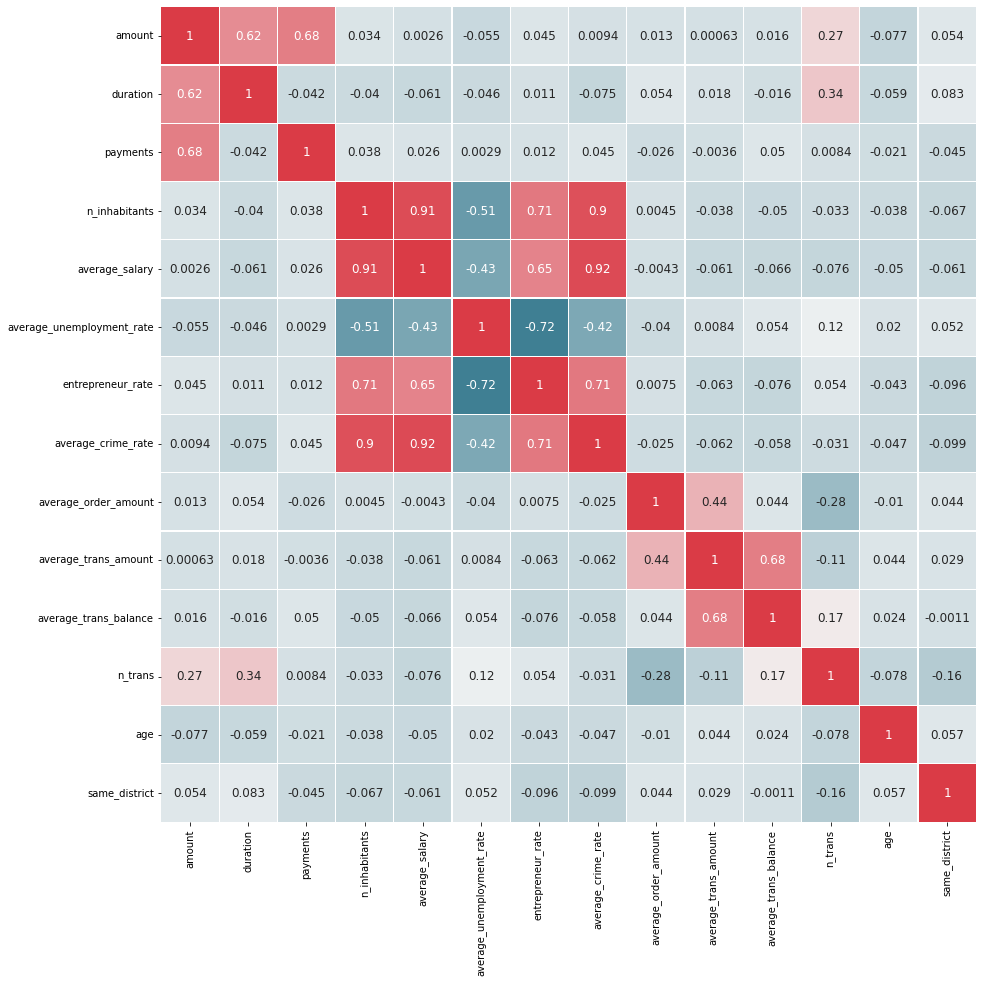

In [1382]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        df_ml.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

  **Transformation**

Quick transformation:
Numerical variables are scaled using MinMaxScaler and the catergorical variables are one-hot encoded.

In [1383]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [1384]:
num_cols = df_ml.columns[:-5]
cat_cols = df_ml.columns[-5:]

In [1385]:
col_trans = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
])

In [1386]:
print (df_ml.days_between)

0     105 days
1     148 days
2     170 days
3     185 days
4     204 days
        ...   
822   513 days
823   521 days
824   573 days
825   644 days
826   533 days
Name: days_between, Length: 827, dtype: timedelta64[ns]


In [1387]:
df_ml.days_between = (df_ml.days_between / np.timedelta64(1,'D')).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1388]:
print (df_ml.days_between)

0      105
1      148
2      170
3      185
4      204
      ... 
822    513
823    521
824    573
825    644
826    533
Name: days_between, Length: 827, dtype: int64


In [1389]:
df_ml.drop(columns = ['n_trans'], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Modeling**

We will be using Random Forest Classifier to identify possibility of loan default. The performance metrics are chosen to be accuracy, F1, ROC AUC. Also the confusion matrices are calculated.

In [1393]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [1394]:
X = pd.get_dummies(df_ml.drop(columns=['loan_type']), drop_first = True)
y = df_ml['loan_type']

In [1395]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [1396]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [1397]:
scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [1398]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [1399]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(random_state=42)

In [1400]:
y_pred_lr = LR.predict(X_test_scaled)

In [1401]:
recall_average = recall_score(y_test, y_pred_lr, average="binary", pos_label="good")

In [1402]:
scores.append(recall_score(y_test, y_pred_lr, pos_label="good"))

In [1403]:
print('recall score:', scores)
print('avg recall score:', sum(scores)/len(scores))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

recall score: [0.6578947368421053]
avg recall score: 0.6578947368421053
[[  9   4]
 [ 52 100]]
              precision    recall  f1-score   support

         bad       0.15      0.69      0.24        13
        good       0.96      0.66      0.78       152

    accuracy                           0.66       165
   macro avg       0.55      0.68      0.51       165
weighted avg       0.90      0.66      0.74       165



In [1404]:
# See the inital model performance
clf = RandomForestClassifier(random_state=10)
print('ROC AUC:', cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc').mean())

ROC AUC: 0.5682446311858076


In [1405]:
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [1406]:
clf = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params,
                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10), scoring='f1')
clf.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1357, in _check_set_wise_labels
    f"pos_label={pos_label} is not a valid label. It "
ValueError: pos_label=1 is not a valid label. It should be one of ['bad', 'good']

  UserWarning,
/usr/local/li

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1')

In [1407]:
print(clf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [1408]:
clf = RandomForestClassifier(n_estimators=10,
                             max_depth=None,
                             min_samples_split=5,
                             min_samples_leaf=1,
                             random_state=11)

In [1409]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=10, random_state=11)

In [1410]:
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)

In [1411]:
print('Train Acc:', accuracy_score(y_train, y_train_pred))
print('Train F1:', f1_score(y_train, y_train_pred, pos_label="good"))
print('Train ROC AUC:', roc_auc_score(y_train, y_train_proba[:, 1]))

Train Acc: 0.9712990936555891
Train F1: 0.9843878389482333
Train ROC AUC: 0.9969525929459152


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


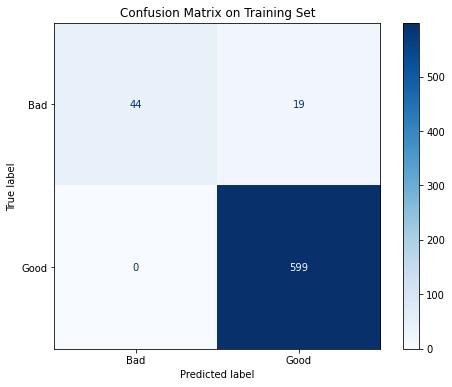

In [1412]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Bad', 'Good'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Training Set')
plt.show()

In [1413]:
y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)

In [1414]:
print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred, pos_label="good"))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))

test Acc: 0.9151515151515152
test F1: 0.9554140127388535
test ROC AUC: 0.6404352226720648


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


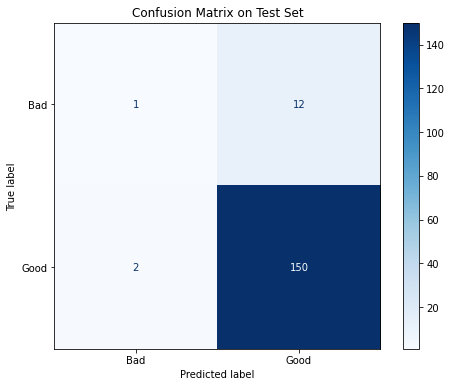

In [1415]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Bad', 'Good'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Test Set')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


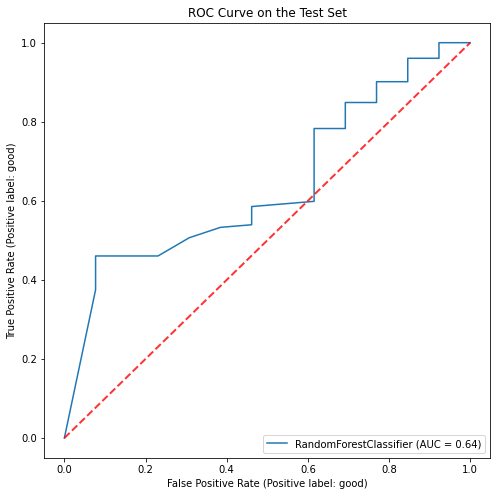

In [1416]:
# ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(clf, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [1427]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

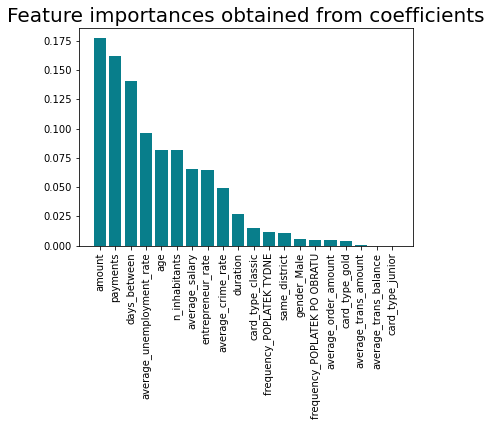

In [1428]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()